# Crime Against Women in India
##### Data Range------> 2001----2021
##### Data Source-----> https://www.kaggle.com/datasets/balajivaraprasad/crimes-against-women-in-india-2001-2021/data

#### Importing the required Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [42]:
data_Crime = pd.read_csv('CrimesOnWomenData.csv')
data_Description= pd.read_csv('Description.csv')

#### Displaying each Dataset

In [43]:
print("CrimesOnWomenData.csv")
print(data_Crime)

CrimesOnWomenData.csv
     Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  \
0             0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   
1             1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   
2             2              ASSAM  2001   817  1070   59   850     4  1248   
3             3              BIHAR  2001   888   518  859   562    21  1558   
4             4       CHHATTISGARH  2001   959   171   70  1763   161   840   
..          ...                ...   ...   ...   ...  ...   ...   ...   ...   
731         731         D&N Haveli  2021  1250  4083  141  2068   417  4731   
732         732        Daman & Diu  2021   315   904   16  1851    10   501   
733         733           Delhi UT  2021     2     1    0     5     1     9   
734         734        Lakshadweep  2021     0     0    0     1     1     3   
735         735         Puducherry  2021     2     0    2    31     3    12   

     WT  
0     7  
1     0  

In [44]:
print("Description.csv")
print(data_Description)

Description.csv
   Unnamed: 0 Column Names                       Explanation
0           0        State                             State
1           1         Year                              Year
2           2         Rape                 No. of Rape cases
3           3          K&A                Kidnap And Assault
4           4           DD                      Dowry Deaths
5           5          AoW             Assault against women
6           6          AoM  Assault against modesty of women
7           7           DV                 Domestic violence
8           8           WT                 Women Trafficking


### Data Preprocessing

#### Data Cleaning

In [45]:
# Creating a dictionary for column renaming
column_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnap and Assault',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault on Women',
    'AoM': 'Assault on Minors',
    'DV': 'Domestic Violence',
    'WT': 'Witchcraft'
}

In [46]:
# Renaming columns and droping unnecessary columns in the dataset
data_Crime.rename(columns=column_names, inplace=True)
final_Data_Crime = data_Crime.drop(columns=['Unnamed: 0'])

In [47]:
# Checking the renamed columns and viewing the cleaned Dataframe
print("Renamed Columns:")
print(final_Data_Crime.columns)

Renamed Columns:
Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft'],
      dtype='object')


#### Displaying the Clean Dataframe

In [48]:
print(final_Data_Crime.head())

               State  Year  Rape Cases  Kidnap and Assault  Dowry Deaths  \
0     ANDHRA PRADESH  2001         871                 765           420   
1  ARUNACHAL PRADESH  2001          33                  55             0   
2              ASSAM  2001         817                1070            59   
3              BIHAR  2001         888                 518           859   
4       CHHATTISGARH  2001         959                 171            70   

   Assault on Women  Assault on Minors  Domestic Violence  Witchcraft  
0              3544               2271               5791           7  
1                78                  3                 11           0  
2               850                  4               1248           0  
3               562                 21               1558          83  
4              1763                161                840           0  


#### Dataframe Info

In [49]:
final_Data_Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               736 non-null    object
 1   Year                736 non-null    int64 
 2   Rape Cases          736 non-null    int64 
 3   Kidnap and Assault  736 non-null    int64 
 4   Dowry Deaths        736 non-null    int64 
 5   Assault on Women    736 non-null    int64 
 6   Assault on Minors   736 non-null    int64 
 7   Domestic Violence   736 non-null    int64 
 8   Witchcraft          736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB


#### Dataframe Statistics

In [50]:
print(final_Data_Crime.describe(include='all'))
print(final_Data_Crime.isnull().sum())

                    State         Year   Rape Cases  Kidnap and Assault  \
count                 736   736.000000   736.000000          736.000000   
unique                 70          NaN          NaN                 NaN   
top     Arunachal Pradesh          NaN          NaN                 NaN   
freq                   11          NaN          NaN                 NaN   
mean                  NaN  2011.149457   727.855978         1134.542120   
std                   NaN     6.053453   977.024945         1993.536828   
min                   NaN  2001.000000     0.000000            0.000000   
25%                   NaN  2006.000000    35.000000           24.750000   
50%                   NaN  2011.000000   348.500000          290.000000   
75%                   NaN  2016.000000  1069.000000         1216.000000   
max                   NaN  2021.000000  6337.000000        15381.000000   

        Dowry Deaths  Assault on Women  Assault on Minors  Domestic Violence  \
count     736.00000

#### Exploratory Data Analysis

In [51]:
# Group by year and sum up all crime types
crime_Data_By_Year = final_Data_Crime.groupby('Year').sum()

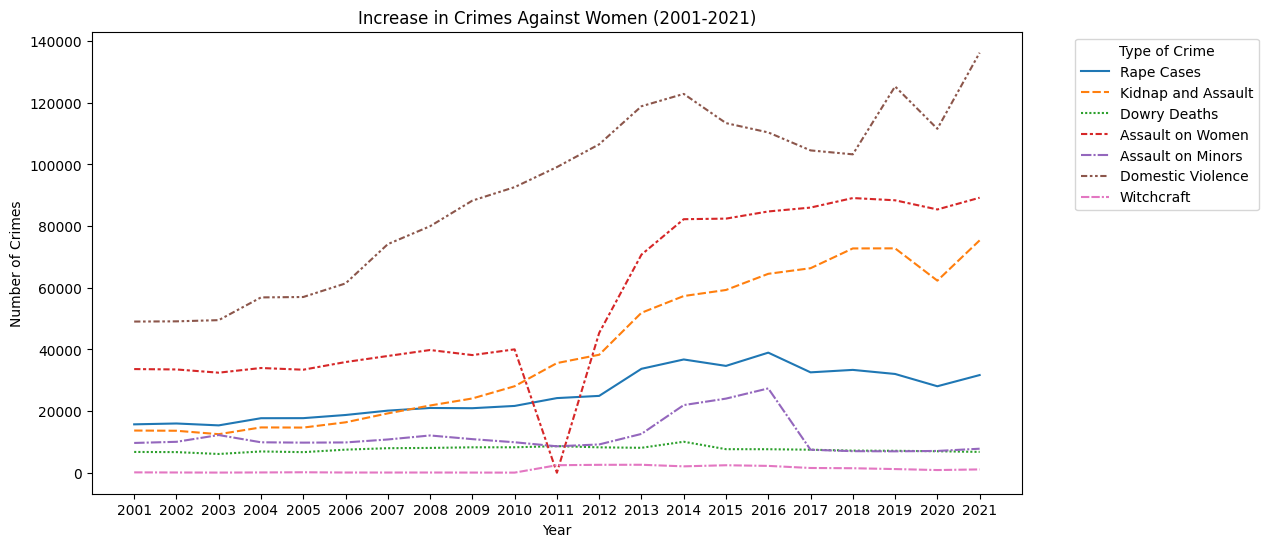

In [61]:
# Plotting the increase in different crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_Data_By_Year)
plt.title('Increase in Crimes Against Women (2001-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(crime_Data_By_Year.index)
plt.legend(title='Type of Crime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [62]:
# Total crimes by state
crime_Data_By_State = final_Data_Crime.groupby('State').sum().sort_values(by='Rape Cases', ascending=False)

<Figure size 1200x600 with 0 Axes>

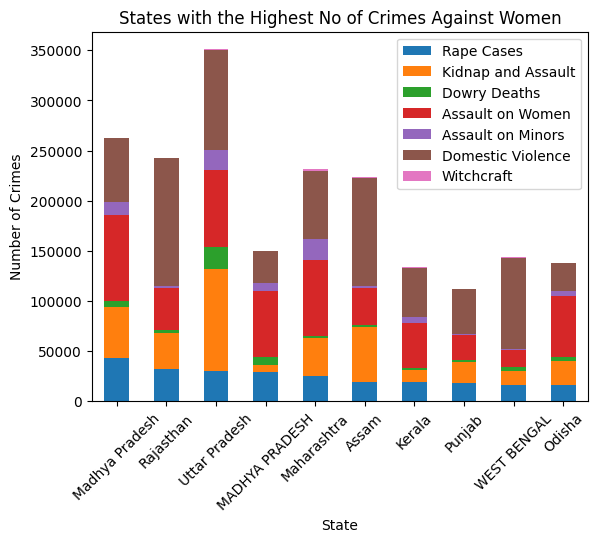

In [69]:
# Top 10 states with the highest number of crimes
top_10_States = crime_Data_By_State.head(10).reset_index()
top_10_States = top_10_States.drop('Year', axis=1)  # Drop the 'Year' column
plt.figure(figsize=(12, 6))
top_10_States.plot(kind='bar', x='State', stacked=True)
plt.title('States with the Highest No of Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

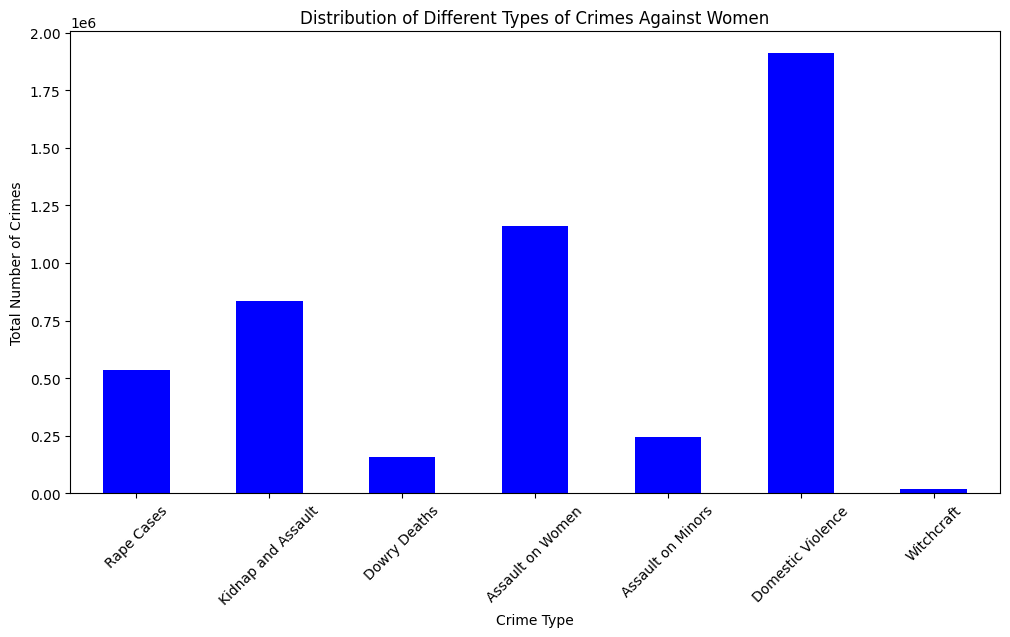

In [70]:
# Sum up all crimes to get a sense of distribution
crime_distribution = final_Data_Crime.drop(['State', 'Year'], axis=1).sum()

plt.figure(figsize=(12, 6))
crime_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Different Types of Crimes Against Women')
plt.xlabel('Crime Type')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.show()


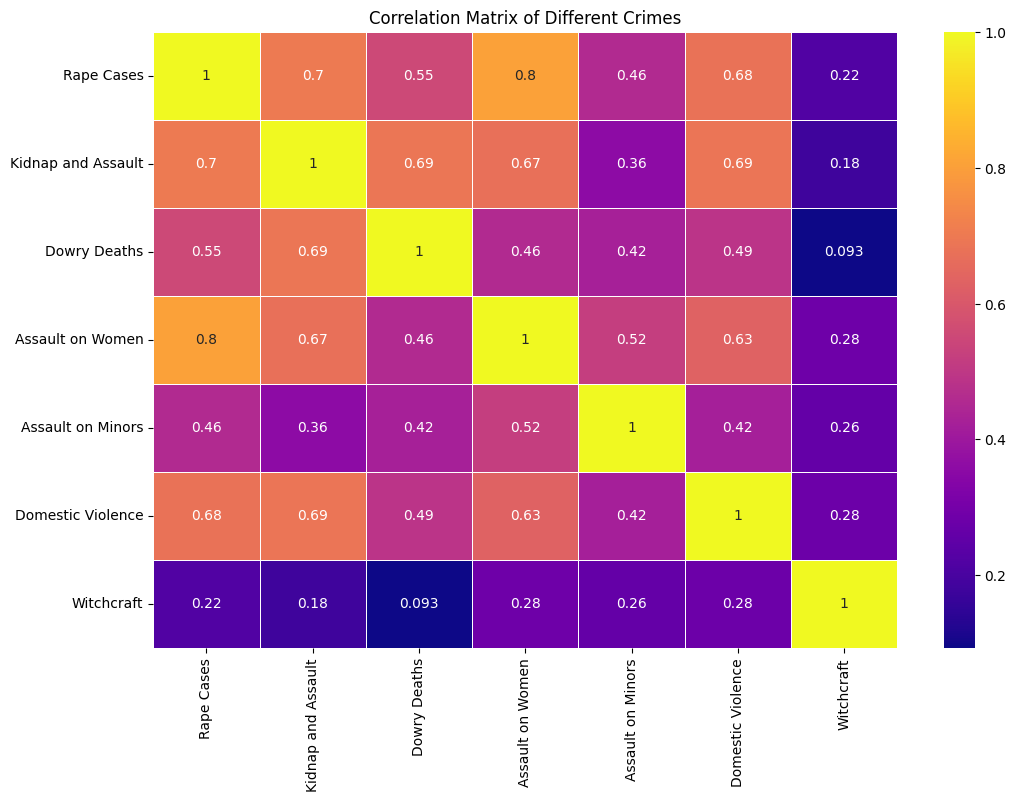

In [76]:
# Displaying the Correlation Matrix and heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = final_Data_Crime.drop(['State', 'Year'], axis=1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Matrix of Different Crimes')
plt.show()

In [81]:
# Calculate the proportion of each crime type within each state
state_crime_proportions = final_Data_Crime.set_index('State').div(final_Data_Crime.set_index('State').sum(axis=1), axis=0)

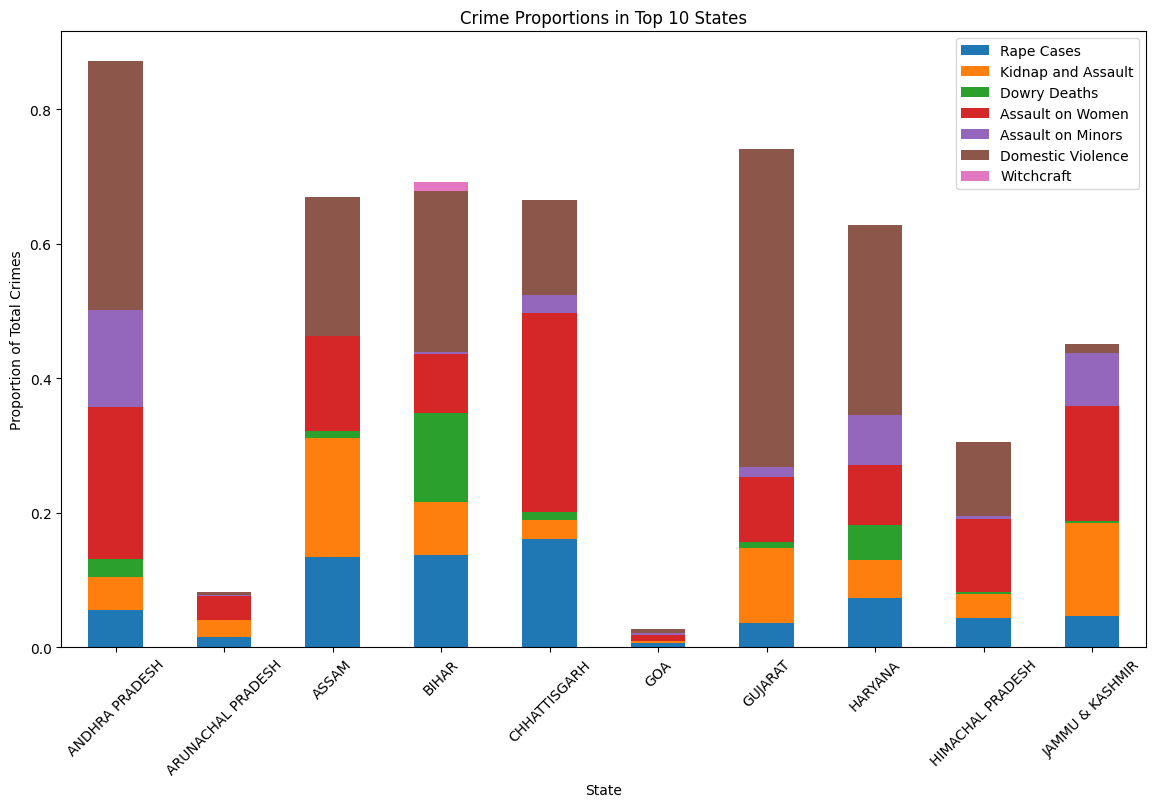

In [82]:
# Plot the proportions for the top 10 states
top_States = state_crime_proportions.head(10)
top_States = top_States.drop('Year', axis=1) 
top_States.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Crime Proportions in Top 10 States')
plt.xlabel('State')
plt.ylabel('Proportion of Total Crimes')
plt.xticks(rotation=45)
plt.show()

In [84]:
# Calculate the mean number of each crime type for the top 10 states with the highest total crime numbers
top_states_mean_crime = final_Data_Crime.groupby('State').mean().sort_values(by='Rape Cases', ascending=False).head(10)

<Figure size 1400x800 with 0 Axes>

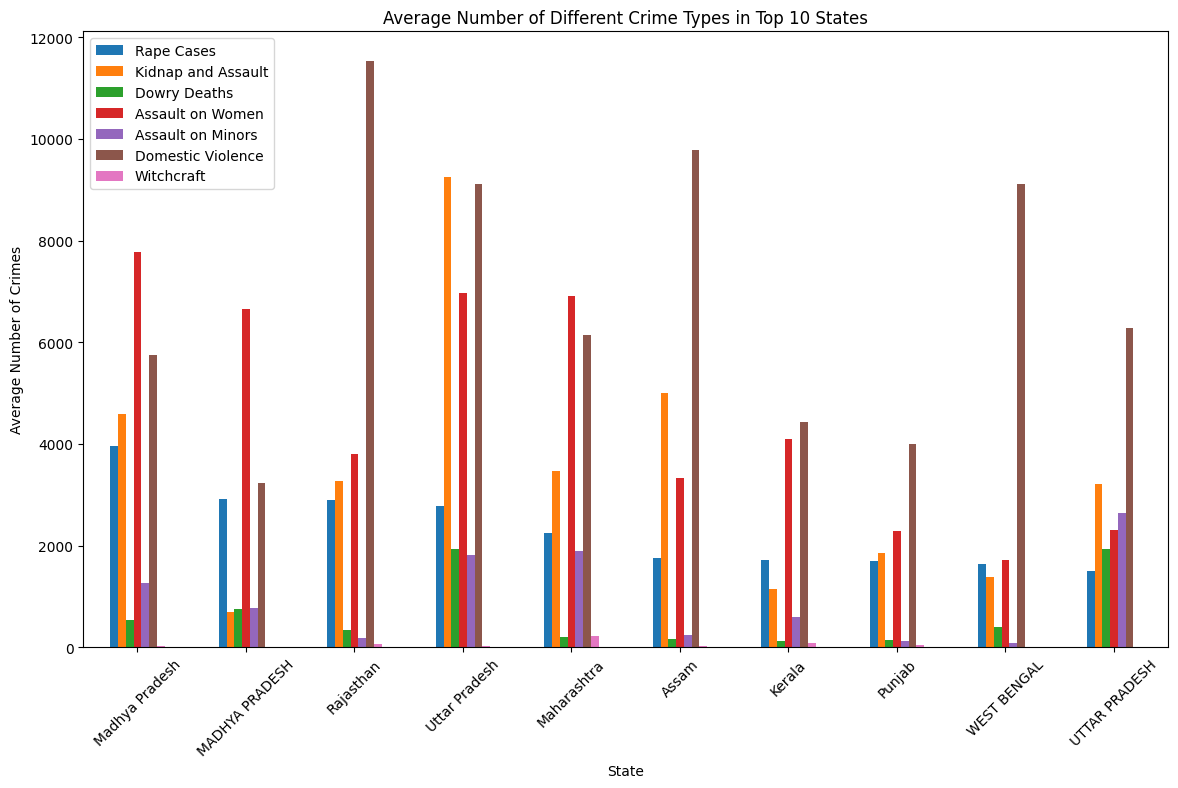

In [85]:
top_states = top_states_mean_crime.drop('Year', axis=1) 
# Plot the comparison
plt.figure(figsize=(14, 8))
top_states.plot(kind='bar', figsize=(14, 8))
plt.title('Average Number of Different Crime Types in Top 10 States')
plt.xlabel('State')
plt.ylabel('Average Number of Crimes')
plt.xticks(rotation=45)
plt.show()